# Répertoire de travail:


In [3]:
cd "C:\Users\narje\Documents\Mon dossier Tableau\Sources de données"

C:\Users\narje\Documents\Mon dossier Tableau\Sources de données


# Importation des librairies:

In [4]:
import numpy as np #importation classique du numpy sous l'alias np
import pandas as pd #importation classique du pandas sous l'alias pd
from pandas import *
import  matplotlib.pyplot as plt #importation classique du module matplotlib.pyplot sous l'alias plt
from matplotlib.collections import LineCollection
from sklearn import *
from scipy.cluster.hierarchy import dendrogram
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import centroid,linkage, fcluster
from sklearn import preprocessing
from sklearn import cluster,metrics
from soccerplots.radar_chart import Radar
import seaborn as sns
from math import pi
from sklearn.cluster import DBSCAN
from collections import Counter

# Importer le fichier :

In [5]:
DF = pd.read_csv('cleaned_DF_projet_9.csv',sep=';') #Importer le fichier cleaned_DF_projet_9 aprés nettoyage et préparartion sur Tableau Prep Builder
DF.describe(include='all')
DF.drop_duplicates(subset=['Zone'],inplace = True)
DF.shape
DF

,Zone,Importations - Volailles,Production-Volailles,Disponibilité intérieure,Exportations - Volailles,PIB,Population,Sous-alimentation (%),Indice de stabilité,Disponibilités protéines moyennes d'origine animale
0,Afghanistan,29,28.0,57,NaN,513.085978,36296.113,23.0,-2.80,10.7
1,Afrique du Sud,514,1667.0,2118,63.0,6121.876572,57009.756,5.5,-0.28,36.0
2,Albanie,38,13.0,47,0.0,4514.204908,2884.169,4.1,0.38,62.7
3,Algérie,2,275.0,277,0.0,4109.701336,41389.189,2.7,-0.92,25.6
4,Allemagne,842,1514.0,1739,646.0,44552.061000,82658.409,0.0,0.59,63.0
...,...,...,...,...,...,...,...,...,...,...
160,Vanuatu,4,1.0,3,NaN,3082.368364,285.510,9.6,0.70,26.7
161,Venezuela (République bolivarienne du),25,600.0,626,0.0,8429.074575,29402.484,22.2,-1.25,24.7
162,Viet Nam,291,918.0,1206,1.0,2365.521494,94600.648,7.2,0.29,37.7
163,Yémen,78,168.0,246,0.0,745.087909,27834.819,46.6,-2.94,9.0


# Nettoyage du dataframe DF :

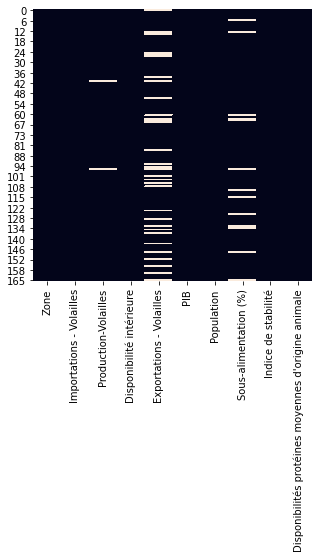

(157, 10)

In [6]:
plt.figure(figsize=(5,5)) #Carte chaleur des NaN
sns.heatmap(DF.isna(),cbar=False)
plt.show()
DF.shape

In [7]:
DF.dropna(axis = 0 ,how = 'any' , inplace = True) # supprimer les lignes contenant des NaN
DF.shape

(120, 10)

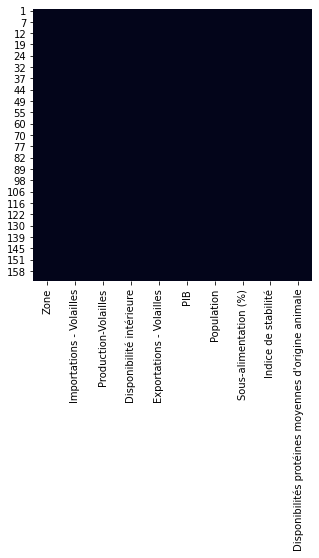

In [13]:
plt.figure(figsize=(5,5)) #Carte chaleur des NaN
sns.heatmap(DF.isna(),cbar=False)
plt.show()

In [9]:
(DF.isna().sum()/DF.shape[0]).sort_values() #Vérifier q'on a pas des valeurs manquantes

Zone                                                   0.0
Importations - Volailles                               0.0
Production-Volailles                                   0.0
Disponibilité intérieure                               0.0
Exportations - Volailles                               0.0
PIB                                                    0.0
Population                                             0.0
Sous-alimentation (%)                                  0.0
Indice de stabilité                                    0.0
Disponibilités protéines moyennes d'origine animale    0.0
dtype: float64

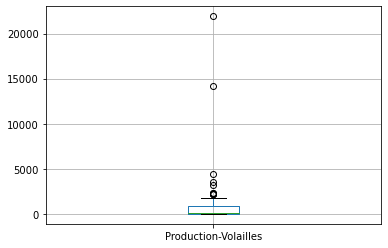

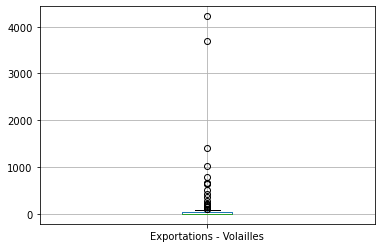

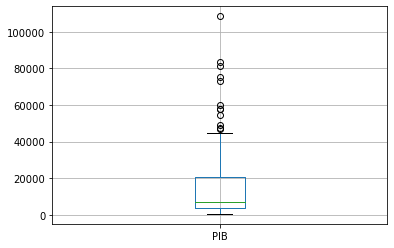

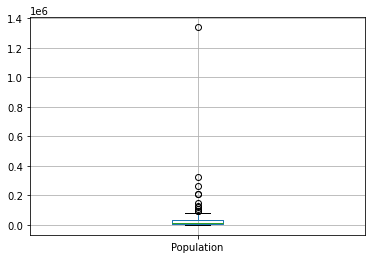

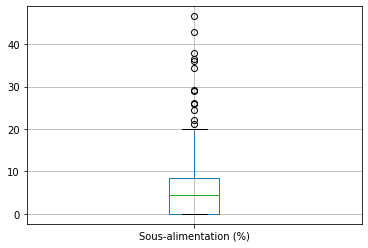

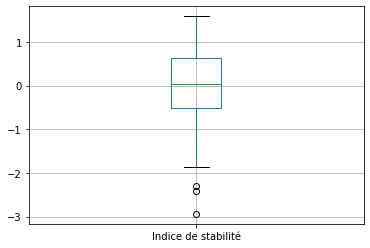

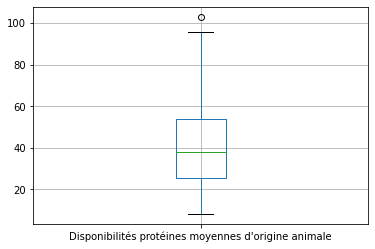

In [10]:
# Analyses des outliers
for col in DF.select_dtypes('float'):
    plt.figure()
    DF.boxplot(column = [col])
    plt.show()

C:\Users\narje\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


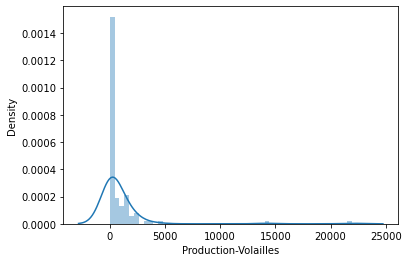

C:\Users\narje\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


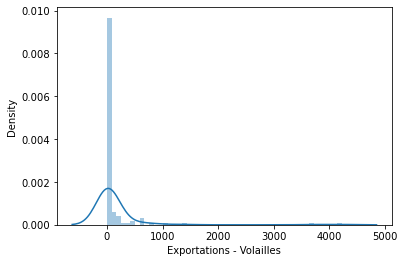

C:\Users\narje\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


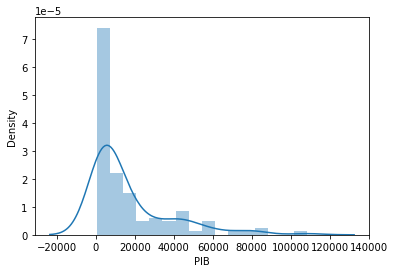

C:\Users\narje\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


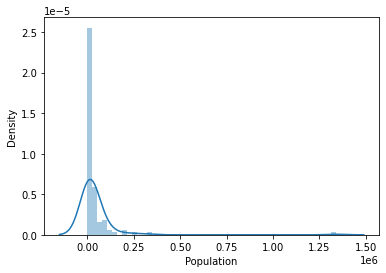

C:\Users\narje\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


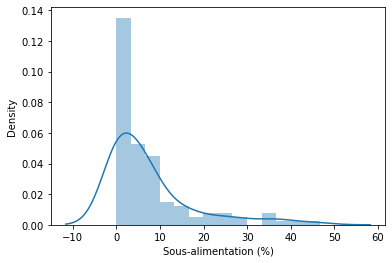

C:\Users\narje\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


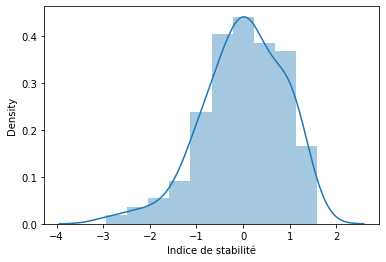

C:\Users\narje\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


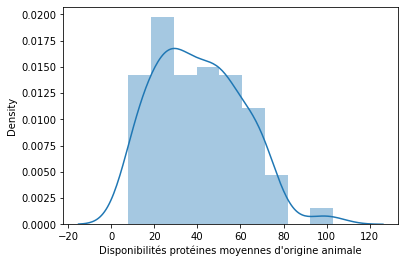

In [11]:
# Courbe de distribution des variables quantitatives:
for col in DF.select_dtypes('float'):
    plt.figure()
    sns.distplot(DF[col])
    plt.show()

# Fonctions :

In [12]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,7))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(8,8))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

def plot_dendrogram(Z, names):
    plt.figure(figsize=(5,7))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('distance')
    dendrogram(
        Z,
        labels = names,
        orientation = "left",
    )
    plt.show()

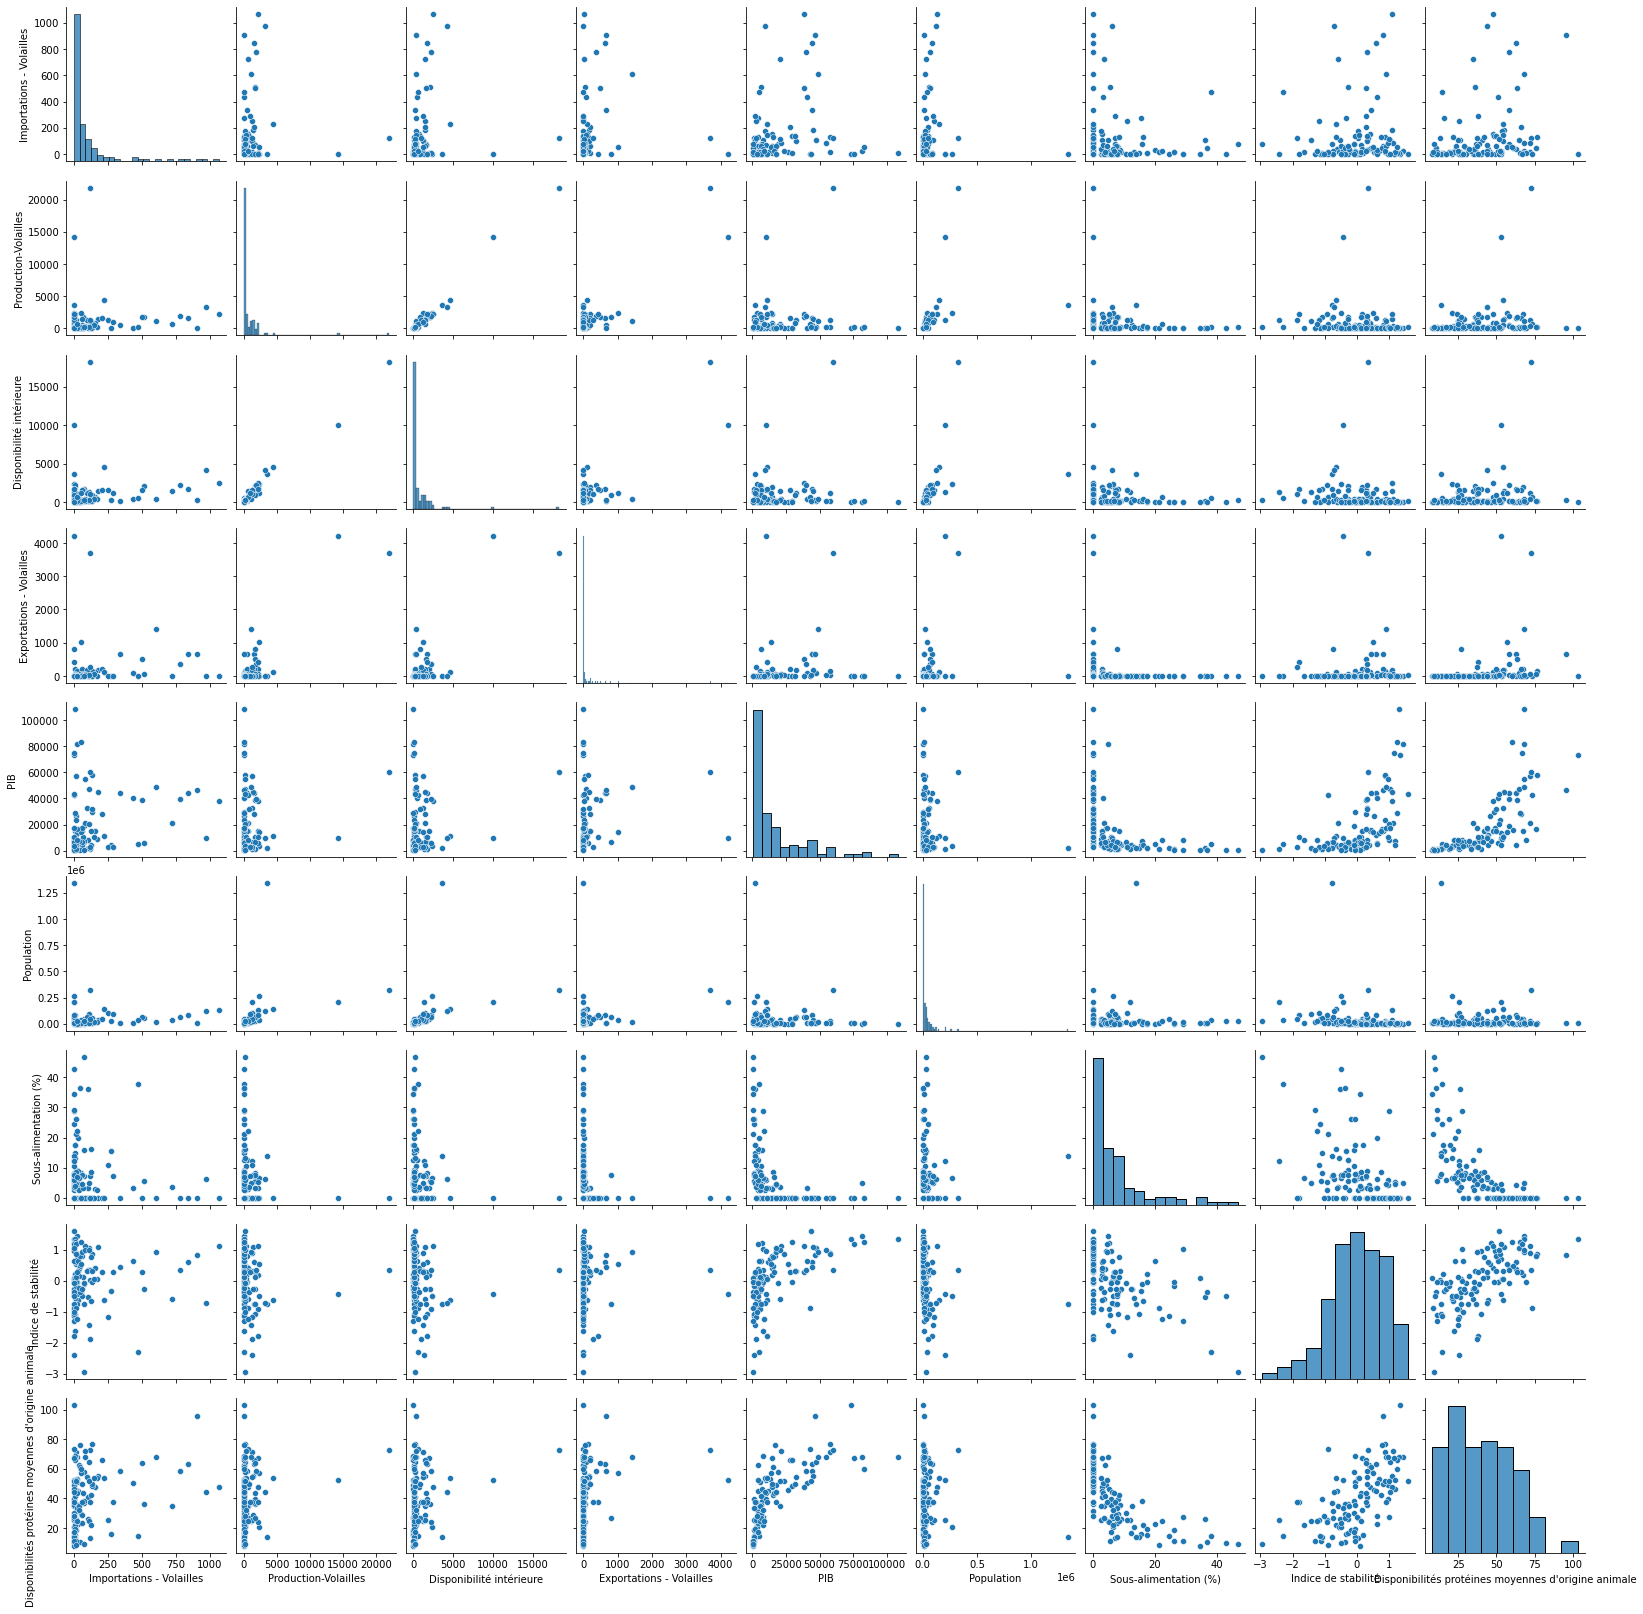

In [11]:
sns.pairplot(DF) # Matrice de correlation entre les # variables
plt.show()

# Analyse en Composantes Principales (ACP):

In [14]:
# Choix du nombre de composantes à calculer :

n_comp = 6

# selection des colonnes à prendre en compte dans l'ACP :

data_pca = DF[[
     'Importations - Volailles', 'Production-Volailles',
       'Disponibilité intérieure', 'Exportations - Volailles', 'PIB',
       'Population', 'Sous-alimentation (%)', 'Indice de stabilité',
       "Disponibilités protéines moyennes d'origine animale"
       ]]
data_pca

,Importations - Volailles,Production-Volailles,Disponibilité intérieure,Exportations - Volailles,PIB,Population,Sous-alimentation (%),Indice de stabilité,Disponibilités protéines moyennes d'origine animale
1,514,1667.0,2118,63.0,6121.876572,57009.756,5.5,-0.28,36.0
2,38,13.0,47,0.0,4514.204908,2884.169,4.1,0.38,62.7
3,2,275.0,277,0.0,4109.701336,41389.189,2.7,-0.92,25.6
4,842,1514.0,1739,646.0,44552.061000,82658.409,0.0,0.59,63.0
5,277,42.0,319,0.0,4095.811686,29816.766,15.4,-0.33,15.7
...,...,...,...,...,...,...,...,...,...
158,121,1211.0,1009,273.0,2521.827514,44487.709,0.0,-1.87,37.3
159,3,33.0,33,3.0,17322.172592,3436.641,0.0,1.05,44.0
161,25,600.0,626,0.0,8429.074575,29402.484,22.2,-1.25,24.7
162,291,918.0,1206,1.0,2365.521494,94600.648,7.2,0.29,37.7


In [15]:

# Préparation des données pour l'ACP :

X = data_pca.values
names = DF.index
features = data_pca.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = PCA(n_components = n_comp)
pca.fit(X_scaled)

PCA(n_components=6)

C:\Users\narje\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


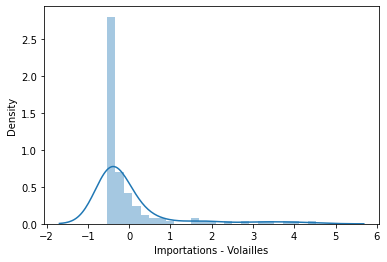

C:\Users\narje\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


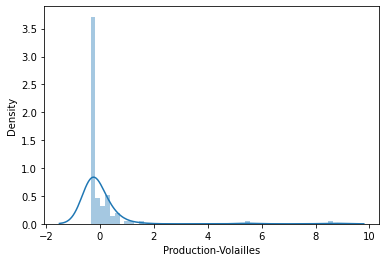

C:\Users\narje\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


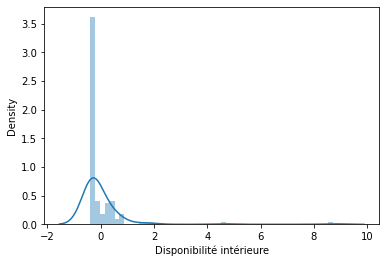

C:\Users\narje\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


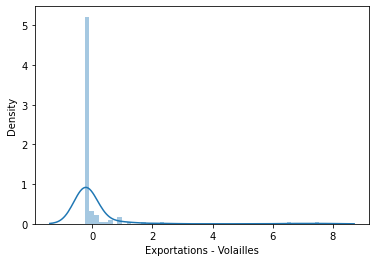

C:\Users\narje\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


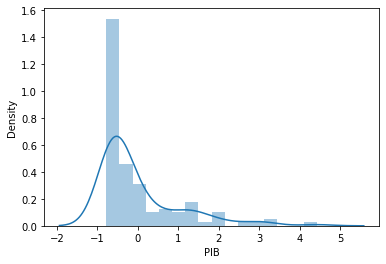

C:\Users\narje\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


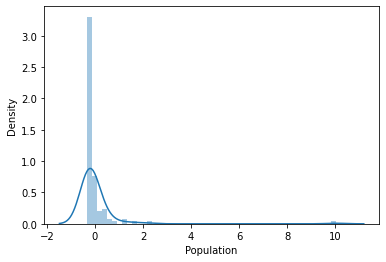

C:\Users\narje\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


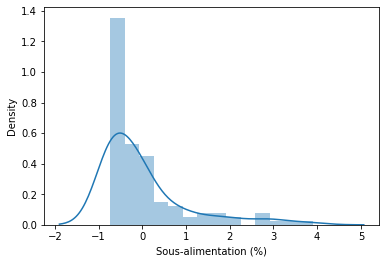

C:\Users\narje\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


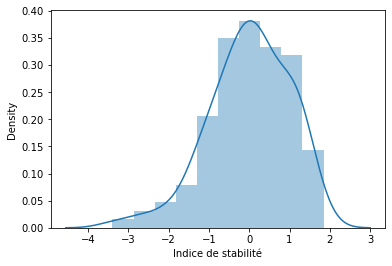

C:\Users\narje\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


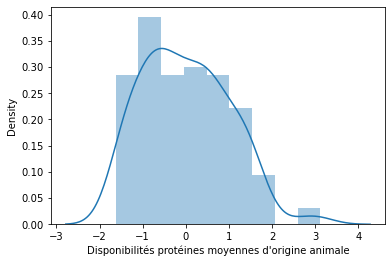

In [16]:
# Vérifions la standardisation de données:
X_scaled = pd.DataFrame(data = X_scaled) #convertir X_scaled en dataframe
X_scaled.columns = data_pca.columns
for col in X_scaled.columns:
    plt.figure()
    sns.distplot(X_scaled[col])
    plt.show()

In [15]:
print(np.std(X_scaled,axis=0)) # vérification moyennes nulles et les écarts-type unitaires

print(np.mean(X_scaled,axis=0))

Importations - Volailles                               1.0
Production-Volailles                                   1.0
Disponibilité intérieure                               1.0
Exportations - Volailles                               1.0
PIB                                                    1.0
Population                                             1.0
Sous-alimentation (%)                                  1.0
Indice de stabilité                                    1.0
Disponibilités protéines moyennes d'origine animale    1.0
dtype: float64
Importations - Volailles                               4.625929e-18
Production-Volailles                                   3.053113e-17
Disponibilité intérieure                               2.451743e-17
Exportations - Volailles                               0.000000e+00
PIB                                                   -4.348374e-17
Population                                            -2.509567e-17
Sous-alimentation (%)                         

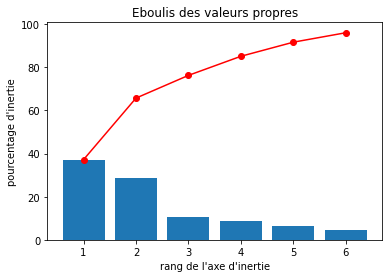

In [17]:
# Eboulis des valeurs propres

display_scree_plot(pca)

#Le porcentage (d'information) d'inertie expliqué par le 1er plan factoriel (1er axe + 2eme axe = 65%)

<Figure size 360x360 with 0 Axes>

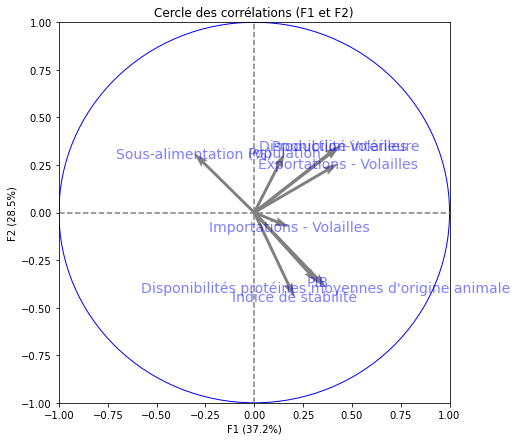

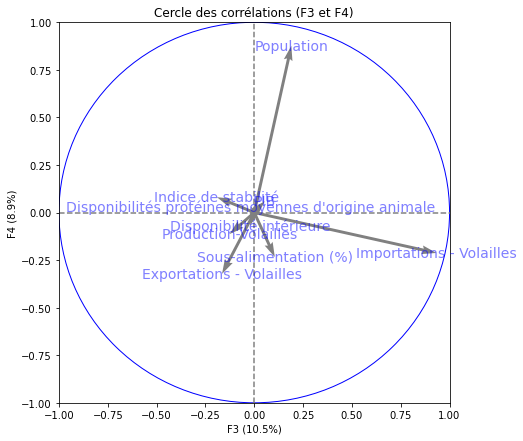

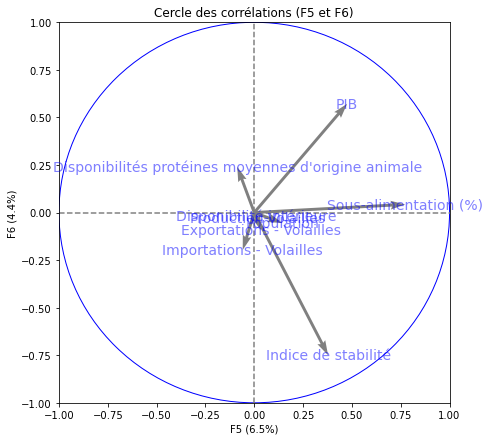

In [18]:
# Cercle des corrélations
fig = plt.figure(figsize = (5,5))
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))
plt.show()

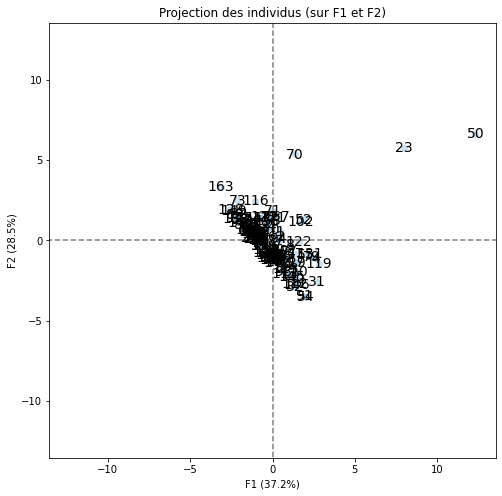

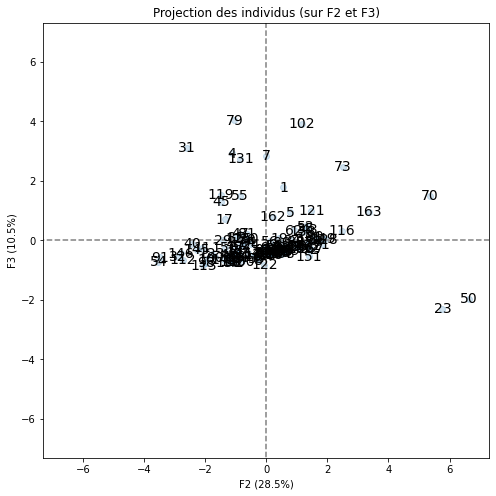

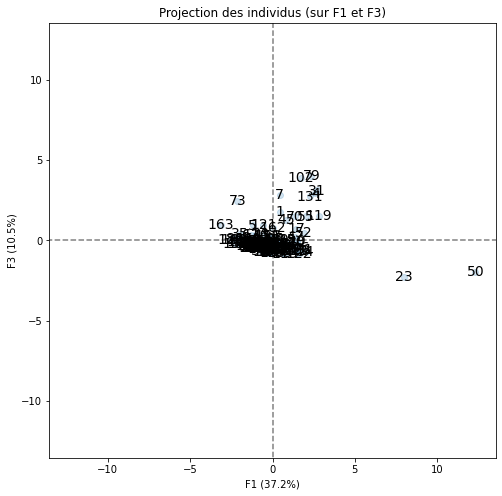

(120, 6)

In [19]:
# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(1,2),(0,2)], alpha = 0.2,labels = np.array(names))
plt.show()
X_projected.shape

# ACH

In [20]:
# Clustering hiérarchique
Z = linkage(X_scaled, 'ward')

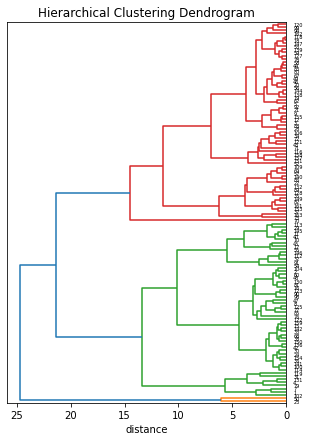

In [21]:
# Affichage du dendrogramme
names = DF.index
plot_dendrogram(Z, names)
plt.show()

In [22]:
# Analyse pour un nombre des clusters égale à 3 :

clusters3 = fcluster(Z, 3, criterion='maxclust') # Coupage du dendrogramme en 3 clusters
names = DF.Zone
C3 = pd.DataFrame({"Zone": names,"clusters": clusters3})

A = C3.groupby(['Zone']).sum()

print(C3)

# Effectifs par groupe :

names = DF.Zone
B = C3.groupby(['clusters']).count()
B = pd.DataFrame(data = B)
B.reset_index(inplace = True) #reindexation de dataframe B
B['clusters'] = B['clusters'].apply(str)
print(B,'\n')

P = pd.merge(C3, DF, how = 'inner', on = 'Zone') #jointure entre la table C et la table DF

N3 = P.groupby(['clusters']).mean() #Calcul de la moyenne de chaque variable pour chaque groupe

std_scale = preprocessing.StandardScaler().fit(N3)
N3_scaled = std_scale.transform(N3)
N3_scaled = pd.DataFrame(data = N3_scaled)

N3_scaled.columns = data_pca.columns
N3_scaled.index = np.arange(1, len(N3_scaled) + 1) #Commencer l'indexation de 1 au lieu de 0
N3_scaled['clusters'] = N3_scaled.index


N3_scaled.set_index('clusters',inplace=True)

N3_scaled


                                       Zone  clusters
1                            Afrique du Sud         2
2                                   Albanie         2
3                                   Algérie         3
4                                 Allemagne         2
5                                    Angola         3
..                                      ...       ...
158                                 Ukraine         3
159                                 Uruguay         2
161  Venezuela (République bolivarienne du)         3
162                                Viet Nam         3
163                                   Yémen         3

[120 rows x 2 columns]
  clusters  Zone
0        1     2
1        2    55
2        3    63 



,Importations - Volailles,Production-Volailles,Disponibilité intérieure,Exportations - Volailles,PIB,Population,Sous-alimentation (%),Indice de stabilité,Disponibilités protéines moyennes d'origine animale
clusters,,,,,,,,,
1,-0.588107,1.414213,1.414213,1.413813,0.865747,1.403878,-0.833819,-0.106100,0.862786
2,1.407875,-0.706038,-0.705723,-0.677750,0.535559,-0.849741,-0.572312,1.274343,0.539019
3,-0.819768,-0.708175,-0.708490,-0.736063,-1.401306,-0.554136,1.406131,-1.168243,-1.401805


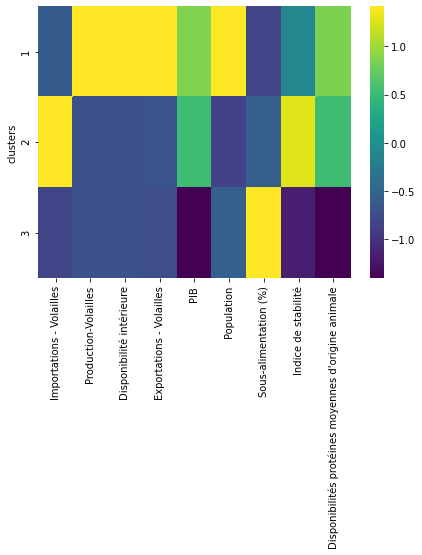

In [22]:
# Heatmap avec les croisements entre les clusters de pays et les différentes variables:

N3_scaled.columns = data_pca.columns

plt.figure(figsize=(7,5))
sns.heatmap(N3_scaled, cmap = 'viridis') # Graphe carte chaleur des groupes des zones
plt.savefig("Carte chaleur avec les croisements entre les clusters de pays et les différentes variables ACH_3G.png" , dpi = 300,bbox_inches = 'tight') #enregistrement de figure dans le répertoire de travail et augmentation de la résolution
plt.show()

In [23]:
#Interprétations:

#print(C3[C3['group']==2]) #Filtre sur le groupe des pays à recommander
#Groupe 2 : pays qui importent les plus,qui ont un bon Indice de Stabilité et qui sont assez riche donc à recommander
F = C3[C3['clusters']==2]
F

,Zone,clusters
1,Afrique du Sud,2
2,Albanie,2
4,Allemagne,2
7,Arabie saoudite,2
8,Argentine,2
10,Australie,2
11,Autriche,2
15,Barbade,2
16,Bélarus,2
17,Belgique,2


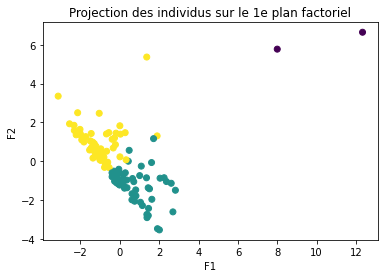

In [24]:
# Projection des individus sur le 1e plan factoriel ACH_3G:

plt.figure()

plt.scatter(X_projected[:,0], X_projected[:,1] , c=clusters3.astype(np.float))#Graphe nuage des points
plt.xlabel('F1')
plt.ylabel('F2')
plt.title("Projection des individus sur le 1e plan factoriel")

plt.show()

In [25]:
# Analyse pour nombre des clusters égale à 5 :

clusters5 = fcluster(Z, 5, criterion = 'maxclust') # Coupage du dendrogramme en 5 clusters
names = DF.Zone
C5 = pd.DataFrame({"Zone": names,"Clusters": clusters5})
A = C5.groupby(['Zone']).sum()
print(C5)
# Effectifs par groupe :

names = DF.Zone
B = C5.groupby(['Clusters']).count()
B = pd.DataFrame(data = B)
B.reset_index(inplace = True) #reindexation de dataframe B
B['Clusters'] = B['Clusters'].apply(str)
print(B)

P = pd.merge(C5, DF, how = 'inner', on = 'Zone') #jointure entre la table C et la table DF

N5 = P.groupby(['Clusters']).mean() #Calcul de la moyenne de chaque variable pour chaque groupe

std_scale = preprocessing.StandardScaler().fit(N5)
N5_scaled = std_scale.transform(N5)
N5_scaled = pd.DataFrame(data = N5_scaled)

N5_scaled.columns = data_pca.columns
N5_scaled.index = np.arange(1, len(N5_scaled) + 1) #Commencer l'indexation de 1 au lieu de 0

N5_scaled['Clusters'] = N5_scaled.index
N5_scaled.set_index('Clusters',inplace=True)

N5_scaled

                                       Zone  Clusters
1                            Afrique du Sud         2
2                                   Albanie         3
3                                   Algérie         4
4                                 Allemagne         2
5                                    Angola         4
..                                      ...       ...
158                                 Ukraine         4
159                                 Uruguay         3
161  Venezuela (République bolivarienne du)         4
162                                Viet Nam         4
163                                   Yémen         4

[120 rows x 2 columns]
  Clusters  Zone
0        1     2
1        2     8
2        3    47
3        4    62
4        5     1


,Importations - Volailles,Production-Volailles,Disponibilité intérieure,Exportations - Volailles,PIB,Population,Sous-alimentation (%),Indice de stabilité,Disponibilités protéines moyennes d'origine animale
Clusters,,,,,,,,,
1,-0.451471,1.971391,1.946158,1.991599,0.993835,-0.150952,-0.995902,0.074114,0.999098
2,1.991687,-0.487531,-0.436681,-0.324176,0.772340,-0.549982,-0.677624,0.677379,0.654504
3,-0.383487,-0.655709,-0.726573,-0.523709,0.666963,-0.652207,-0.759020,1.434261,0.737760
4,-0.496872,-0.641076,-0.697558,-0.563747,-1.142870,-0.614527,1.131855,-0.880977,-0.904279
5,-0.659857,-0.187075,-0.085347,-0.579967,-1.290268,1.967668,1.300691,-1.304776,-1.487083


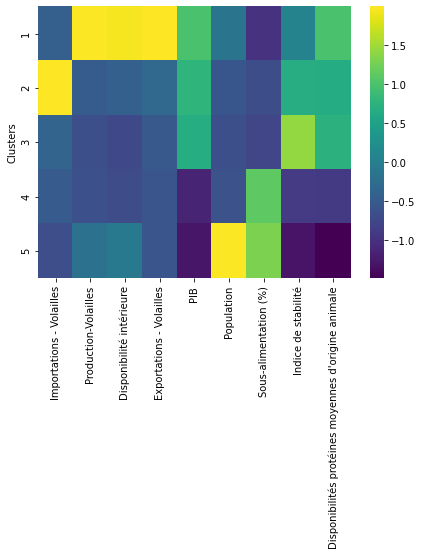

In [26]:
# Heatmap avec les croisements entre les clusters de pays et les différentes variables:

N5_scaled.columns = data_pca.columns

plt.figure(figsize=(7,5))
sns.heatmap(N5_scaled, cmap = 'viridis') # Graphe carte chaleur des groupes des zones
plt.savefig("Carte chaleur avec les croisements entre les clusters de pays et les différentes variables ACH_5G.png" , dpi = 300,bbox_inches = 'tight') #enregistrement de figure dans le répertoire de travail et augmentation de la résolution
plt.show()

In [27]:
#Interprétations:

print(C5[C5['Clusters']==2]) #Filtre sur le groupe des pays à recommander
#Groupe 2 : pays qui importent les plus,qui ont un bon Indice de Stabilité et qui sont assez riche donc à recommander
C5[C5['Clusters']==2]

                                                  Zone  Clusters
1                                       Afrique du Sud         2
4                                            Allemagne         2
7                                      Arabie saoudite         2
31                            Chine - RAS de Hong-Kong         2
79                                               Japon         2
102                                            Mexique         2
119                                           Pays-Bas         2
131  Royaume-Uni de Grande-Bretagne et d'Irlande du...         2


,Zone,Clusters
1,Afrique du Sud,2
4,Allemagne,2
7,Arabie saoudite,2
31,Chine - RAS de Hong-Kong,2
79,Japon,2
102,Mexique,2
119,Pays-Bas,2
131,Royaume-Uni de Grande-Bretagne et d'Irlande du...,2


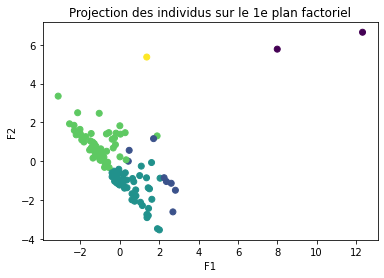

In [28]:
# Projection des individus sur le 1e plan factoriel ACH_5G:

plt.figure()

plt.scatter(X_projected[:,0], X_projected[:,1],c=clusters5.astype(np.float))#Graphe nuage des points
plt.xlabel('F1')
plt.ylabel('F2')
plt.title("Projection des individus sur le 1e plan factoriel")

plt.show()

In [29]:
# Analyse pour nombre des clusters égale à 7 :

clusters7 = fcluster(Z, 7, criterion='maxclust') # Coupage du dendrogramme en 7 clusters
names = DF.Zone
C7 = pd.DataFrame({"Zone": names,"group": clusters7})
A = C7.groupby(['Zone']).sum()
#print(C[C['group']==2])
print(C7)
# Effectifs par groupe :

names = DF.Zone
B = C7.groupby(['group']).count()
B = pd.DataFrame(data = B)
B.reset_index(inplace = True) #reindexation de dataframe B
B['group'] = B['group'].apply(str)
print(B)

P = pd.merge(C7, DF, how = 'inner', on = 'Zone') #jointure entre la table C et la table DF

N7 = P.groupby(['group']).mean() #Calcul de la moyenne de chaque variable pour chaque groupe

std_scale = preprocessing.StandardScaler().fit(N7)
N7_scaled = std_scale.transform(N7)
N7_scaled = pd.DataFrame(data = N7_scaled)

N7_scaled.columns = data_pca.columns
N7_scaled.index = np.arange(1, len(N7_scaled) + 1) #Commencer l'indexation de 1 au lieu de 0
N7_scaled['group'] = N7_scaled.index
N7_scaled.set_index('group',inplace=True)
N7_scaled

                                       Zone  group
1                            Afrique du Sud      2
2                                   Albanie      3
3                                   Algérie      6
4                                 Allemagne      2
5                                    Angola      6
..                                      ...    ...
158                                 Ukraine      6
159                                 Uruguay      3
161  Venezuela (République bolivarienne du)      5
162                                Viet Nam      6
163                                   Yémen      5

[120 rows x 2 columns]
  group  Zone
0     1     2
1     2     8
2     3    33
3     4    14
4     5    17
5     6    45
6     7     1


,Importations - Volailles,Production-Volailles,Disponibilité intérieure,Exportations - Volailles,PIB,Population,Sous-alimentation (%),Indice de stabilité,Disponibilités protéines moyennes d'origine animale
group,,,,,,,,,
1,-0.391352,2.408837,2.373834,2.438779,0.641606,0.036596,-0.794011,-0.039407,0.976633
2,2.425198,-0.330973,-0.250360,-0.191914,0.483390,-0.409884,-0.594798,0.475449,0.650366
3,-0.396436,-0.520046,-0.574104,-0.428817,-0.230664,-0.525458,-0.608095,0.875397,0.553035
4,-0.116254,-0.514394,-0.559034,-0.394453,1.913817,-0.521451,-0.734489,1.701295,1.144428
5,-0.447205,-0.571346,-0.620551,-0.484923,-0.963172,-0.518648,2.164849,-0.995086,-1.301407
6,-0.442365,-0.475882,-0.506346,-0.456184,-0.855017,-0.468298,-0.076902,-0.801429,-0.645733
7,-0.631586,0.003805,0.136561,-0.482489,-0.989961,2.407143,0.643447,-1.216219,-1.377323


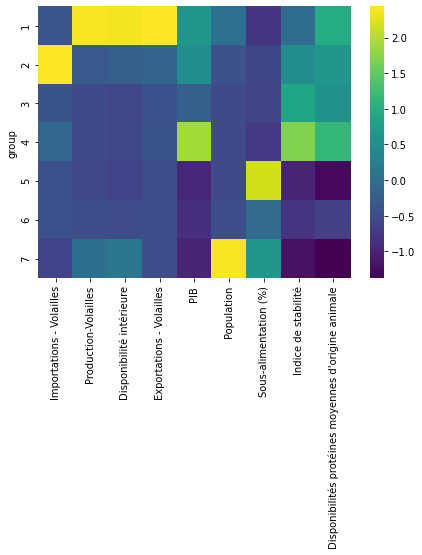

In [30]:
# Heatmap avec les croisements entre les clusters de pays et les différentes variables:

N7_scaled.columns = data_pca.columns

plt.figure(figsize=(7,5))
sns.heatmap(N7_scaled, cmap = 'viridis') # Graphe carte chaleur des groupes des zones
plt.savefig("Carte chaleur avec les croisements entre les clusters de pays et les différentes variables ACH_7G.png" , dpi = 300,bbox_inches = 'tight') #enregistrement de figure dans le répertoire de travail et augmentation de la résolution
plt.show()

In [31]:
#Interprétations:

print(C7[C7['group']==2]) #Filtre sur le groupe des pays à recommander
#Groupe 2 : pays qui importent les plus,qui ont un bon Indice de Stabilité et qui sont assez riche donc à recommander
C7[C7['group']==2]

                                                  Zone  group
1                                       Afrique du Sud      2
4                                            Allemagne      2
7                                      Arabie saoudite      2
31                            Chine - RAS de Hong-Kong      2
79                                               Japon      2
102                                            Mexique      2
119                                           Pays-Bas      2
131  Royaume-Uni de Grande-Bretagne et d'Irlande du...      2


,Zone,group
1,Afrique du Sud,2
4,Allemagne,2
7,Arabie saoudite,2
31,Chine - RAS de Hong-Kong,2
79,Japon,2
102,Mexique,2
119,Pays-Bas,2
131,Royaume-Uni de Grande-Bretagne et d'Irlande du...,2


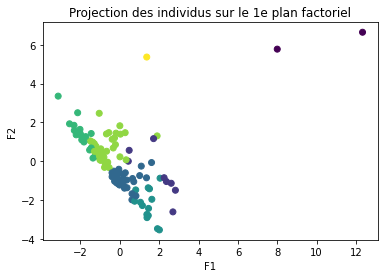

In [32]:
# Projection des individus sur le 1e plan factoriel ACH_7G:

plt.figure()

plt.scatter(X_projected[:,0], X_projected[:,1],c=clusters7.astype(np.float))#Graphe nuage des points
plt.xlabel('F1')
plt.ylabel('F2')
plt.title("Projection des individus sur le 1e plan factoriel")

plt.show()

In [33]:
# Analyse pour nombre des clusters égale à 12 :

clusters12 = fcluster(Z, 12, criterion = 'maxclust') # Coupage du dendrogramme en 12 clusters
names = DF.Zone
C12 = pd.DataFrame({"Zone": names,"group": clusters12})
A = C12.groupby(['Zone']).sum()
#print(C[C['group']==2])
print(C12)

# Effectifs par groupe :

names = DF.Zone
B = C12.groupby(['group']).count()
B = pd.DataFrame(data = B)
B.reset_index(inplace = True) #reindexation de dataframe B
B['group'] = B['group'].apply(str)
print(B)

P = pd.merge(C12, DF, how = 'inner', on = 'Zone') #jointure entre la table C et la table DF

N12 = P.groupby(['group']).mean() #Calcul de la moyenne de chaque variable pour chaque groupe

std_scale = preprocessing.StandardScaler().fit(N12)
N12_scaled = std_scale.transform(N12)
N12_scaled = pd.DataFrame(data = N12_scaled)

N12_scaled.columns = data_pca.columns
N12_scaled.index = np.arange(1, len(N12_scaled) + 1) #Commencer l'indexation de 1 au lieu de 0
N12_scaled['group'] = N12_scaled.index
N12_scaled.set_index('group',inplace=True)
N12_scaled


                                       Zone  group
1                            Afrique du Sud      3
2                                   Albanie      5
3                                   Algérie     11
4                                 Allemagne      4
5                                    Angola     11
..                                      ...    ...
158                                 Ukraine     10
159                                 Uruguay      5
161  Venezuela (République bolivarienne du)      9
162                                Viet Nam     11
163                                   Yémen      8

[120 rows x 2 columns]
   group  Zone
0      1     1
1      2     1
2      3     3
3      4     5
4      5    33
5      6     5
6      7     9
7      8     2
8      9    15
9     10    11
10    11    34
11    12     1


,Importations - Volailles,Production-Volailles,Disponibilité intérieure,Exportations - Volailles,PIB,Population,Sous-alimentation (%),Indice de stabilité,Disponibilités protéines moyennes d'origine animale
group,,,,,,,,,
1,-0.710465,1.563395,1.276976,2.398167,-0.544326,0.065907,-0.687321,-0.216112,0.418090
2,-0.275856,2.728676,2.857932,2.031591,1.351311,0.391429,-0.687321,0.527237,1.325356
3,1.944268,-0.303502,-0.133619,-0.498312,-0.463420,-0.312236,-0.281922,-0.320441,-0.239678
4,2.324551,-0.380643,-0.359325,-0.089717,0.729911,-0.343847,-0.687321,0.934122,1.048640
5,-0.497990,-0.524083,-0.563632,-0.464275,-0.264040,-0.477124,-0.545443,0.702996,0.474175
6,-0.656863,-0.575899,-0.617537,-0.516491,2.266296,-0.499729,-0.611011,1.474027,1.348038
7,0.004225,-0.487282,-0.512764,-0.385324,0.883089,-0.456738,-0.659058,1.043451,0.852065
8,0.271026,-0.562151,-0.550551,-0.517181,-0.809253,-0.420332,2.671133,-2.372800,-1.435001
9,-0.655173,-0.572011,-0.612359,-0.516629,-0.826663,-0.475004,1.423934,-0.155470,-1.243719


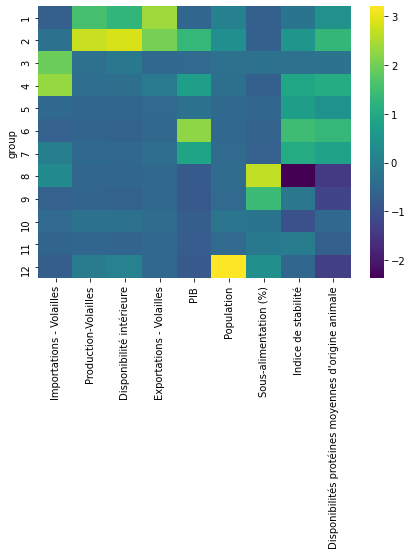

In [34]:
# Heatmap avec les croisements entre les clusters de pays et les différentes variables:

N12_scaled.columns = data_pca.columns

plt.figure(figsize=(7,5))
sns.heatmap(N12_scaled, cmap = 'viridis') # Graphe carte chaleur des groupes des zones
plt.savefig("Carte chaleur avec les croisements entre les clusters de pays et les différentes variables ACH_12G.png" , dpi = 300,bbox_inches = 'tight') #enregistrement de figure dans le répertoire de travail et augmentation de la résolution
plt.show()

In [35]:
#Interprétations:

print(C12[C12['group']==4]) #Filtre sur le groupe des pays à recommander
#Groupe 4 : pays qui importent les plus,qui ont un bon Indice de Stabilité et qui sont assez riche donc à recommander
C12[C12['group']==4]

                                                  Zone  group
4                                            Allemagne      4
31                            Chine - RAS de Hong-Kong      4
79                                               Japon      4
119                                           Pays-Bas      4
131  Royaume-Uni de Grande-Bretagne et d'Irlande du...      4


,Zone,group
4,Allemagne,4
31,Chine - RAS de Hong-Kong,4
79,Japon,4
119,Pays-Bas,4
131,Royaume-Uni de Grande-Bretagne et d'Irlande du...,4


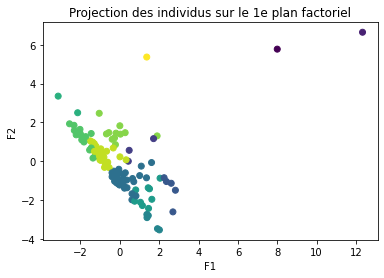

In [36]:
# Projection des individus sur le 1e plan factoriel ACH_12G:

plt.figure()

plt.scatter(X_projected[:,0], X_projected[:,1],c=clusters12.astype(np.float))#Graphe nuage des points
plt.xlabel('F1')
plt.ylabel('F2')
plt.title("Projection des individus sur le 1e plan factoriel")

plt.show()

# Kmeans

In [37]:
inertia = []
k_range = range(1,20)
for k in k_range:
    kmeans = cluster.KMeans(n_clusters = k).fit(X_scaled)
    inertia.append(kmeans.inertia_)
kmeans.inertia_

97.09732721377179

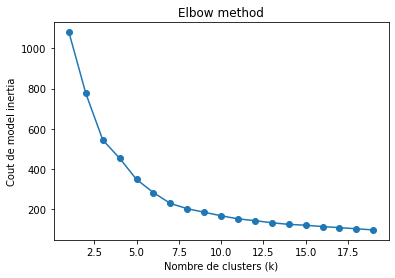

In [38]:
plt.plot(k_range,inertia, marker = 'o')
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Cout de model inertia")
plt.title("Elbow method")
plt.show(block = False)

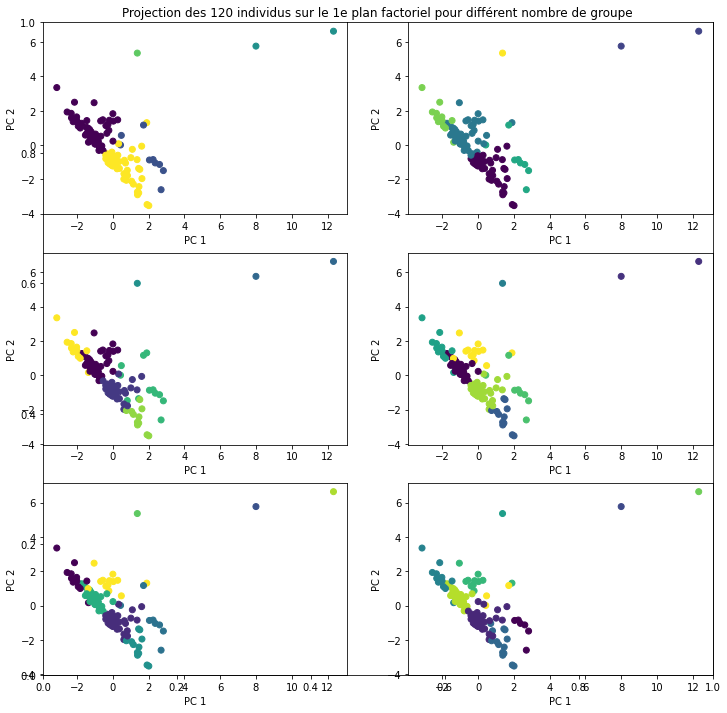

In [39]:
#Scatter(s) plot sur le premier plan factoriel de l'ACP avec des couleurs différentes par groupe pour # type de clustering:

fig = plt.figure(figsize=(12,12))
plt.title("Projection des {} individus sur le 1e plan factoriel pour différent nombre de groupe".format(X_projected.shape[0]))
kmeans5 = cluster.KMeans(n_clusters = 5).fit(X_scaled) # 5 clusters
ax = fig.add_subplot(321)
ax.scatter(X_projected[:,0], X_projected[:,1], c = kmeans5.labels_)#Graphe nuage des points

plt.xlabel("PC 1") #axe des abscisses
plt.ylabel("PC 2") #axe des ordonnées

kmeans6 = cluster.KMeans(n_clusters = 6).fit(X_scaled) # 6 clusters
ax = fig.add_subplot(322)
ax.scatter(X_projected[:,0], X_projected[:,1], c = kmeans6.labels_)#Graphe nuage des points

plt.xlabel("PC 1") #axe des abscisses
plt.ylabel("PC 2") #axe des ordonnées


kmeans7 = cluster.KMeans(n_clusters = 7).fit(X_scaled) # 7 clusters
ax = fig.add_subplot(323)
ax.scatter(X_projected[:,0], X_projected[:,1], c = kmeans7.labels_)#Graphe nuage des points

plt.xlabel("PC 1") #axe des abscisses
plt.ylabel("PC 2") #axe des ordonnées

kmeans8 = cluster.KMeans(n_clusters = 8).fit(X_scaled) # 8 clusters
ax = fig.add_subplot(324)
ax.scatter(X_projected[:,0], X_projected[:,1], c = kmeans8.labels_)#Graphe nuage des points

plt.xlabel("PC 1") #axe des abscisses
plt.ylabel("PC 2") #axe des ordonnées

kmeans9 = cluster.KMeans(n_clusters = 9).fit(X_scaled) # 9 clusters
ax = fig.add_subplot(325)
ax.scatter(X_projected[:,0], X_projected[:,1], c = kmeans9.labels_)#Graphe nuage des points

plt.xlabel("PC 1") #axe des abscisses
plt.ylabel("PC 2") #axe des ordonnées

kmeans10 = cluster.KMeans(n_clusters = 10).fit(X_scaled) # 10 clusters
ax = fig.add_subplot(326)
ax.scatter(X_projected[:,0], X_projected[:,1], c = kmeans10.labels_)#Graphe nuage des points

plt.xlabel("PC 1") #axe des abscisses
plt.ylabel("PC 2") #axe des ordonnées
plt.show()

In [40]:
# Analyse pour nombre des clusters égale à 4 :

kmeans4 = cluster.KMeans(n_clusters = 4) # 4 clusters

kmeans4.fit(X_scaled)

# Récupération des clusters attribués à chaque individu

clusters = kmeans4.labels_
names = DF.Zone
C4 = pd.DataFrame({"Zone": names,"group": clusters})
A4 = C4.groupby(['Zone']).sum()

print(C4)

#Effectifs par groupe :

names = DF.Zone
B = C4.groupby(['group']).count()
B = pd.DataFrame(data = B)
B.reset_index(inplace = True) #reindexation de dataframe B
B['group'] = B['group'].apply(str)
print(B,'\n')

P = pd.merge(C4, DF, how = 'inner', on = 'Zone') #jointure entre la table C5 et la table DF

N4 = P.groupby(['group']).mean() #Calcul de la moyenne de chaque variable pour chaque groupe

std_scale = preprocessing.StandardScaler().fit(N4)
N4_scaled = std_scale.transform(N4)
N4_scaled = pd.DataFrame(data = N4_scaled)

N4_scaled.columns = data_pca.columns
N4_scaled['group'] = N4_scaled.index
N4_scaled.set_index('group',inplace=True)

print('l’inertie intraclasse :',kmeans4.inertia_)

N4_scaled #


                                       Zone  group
1                            Afrique du Sud      1
2                                   Albanie      0
3                                   Algérie      1
4                                 Allemagne      0
5                                    Angola      1
..                                      ...    ...
158                                 Ukraine      1
159                                 Uruguay      0
161  Venezuela (République bolivarienne du)      1
162                                Viet Nam      1
163                                   Yémen      1

[120 rows x 2 columns]
  group  Zone
0     0    56
1     1    61
2     2     2
3     3     1 

l’inertie intraclasse : 439.75106418569925


,Importations - Volailles,Production-Volailles,Disponibilité intérieure,Exportations - Volailles,PIB,Population,Sous-alimentation (%),Indice de stabilité,Disponibilités protéines moyennes d'origine animale
group,,,,,,,,,
0,1.612819,-0.693543,-0.731498,-0.530374,0.832485,-0.723090,-0.883761,1.500172,0.851668
1,-0.313306,-0.721391,-0.765229,-0.593422,-0.927147,-0.707733,0.935509,-0.683244,-0.718211
2,-0.172114,1.706860,1.686244,1.731320,1.152520,-0.272675,-1.108106,0.280367,1.105861
3,-1.127400,-0.291926,-0.189516,-0.607523,-1.057859,1.703498,1.056357,-1.097295,-1.239318


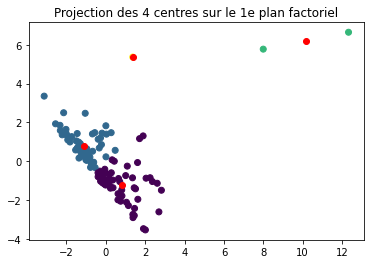

In [41]:
# Affichage des positions des centres de classes :
plt.figure()
centroids = kmeans4.cluster_centers_
centroids_projected = pca.transform(centroids)
plt.scatter(X_projected[:,0], X_projected[:,1], c = kmeans4.labels_)#Graphe nuage des points
plt.scatter(centroids_projected[:,0],centroids_projected[:,1],c = 'r') #Centroides
plt.title("Projection des {} centres sur le 1e plan factoriel".format(len(centroids)))
plt.show()

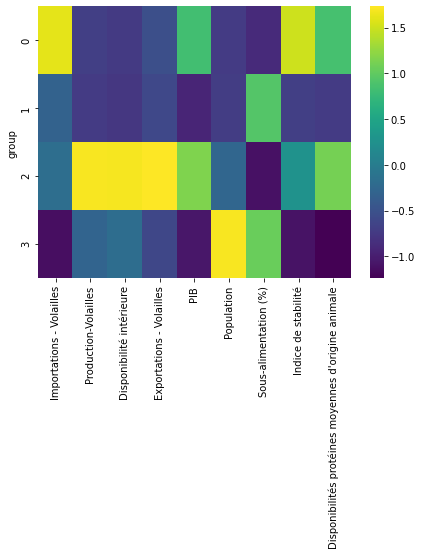

In [42]:
# Heatmap avec les croisements entre les clusters de pays et les différentes variables:

N4_scaled.columns = data_pca.columns

plt.figure(figsize=(7,5))
sns.heatmap(N4_scaled, cmap = 'viridis') # Graphe carte chaleur des groupes des zones
plt.savefig("Carte chaleur avec les croisements entre les clusters de pays et les différentes variables Kmeans_4G.png" , dpi = 300,bbox_inches = 'tight') #enregistrement de figure dans le répertoire de travail et augmentation de la résolution
plt.show()

In [43]:
#Interprétations:

#print(C4[C4['group']==0]) #Filtre sur le groupe des pays à recommander
#Groupe 2 : pays qui importent les plus,qui ont un bon Indice de Stabilité et qui sont assez riche donc à recommander
C4[C4['group']==0]

,Zone,group
2,Albanie,0
4,Allemagne,0
7,Arabie saoudite,0
8,Argentine,0
10,Australie,0
11,Autriche,0
15,Barbade,0
16,Bélarus,0
17,Belgique,0
24,Bulgarie,0


In [70]:
# Analyse pour nombre des clusters égale à 5 :

kmeans5 = cluster.KMeans(n_clusters = 5) # 5 clusters

kmeans5.fit(X_scaled)

# Récupération des clusters attribués à chaque individu
clusters = kmeans5.labels_
names = DF.Zone
C5 = pd.DataFrame({"Zone": names,"group": clusters})
A5 = C5.groupby(['Zone']).sum()
#print(C5[C5['group']==0])

print(C5)

#Effectifs par groupe :

names = DF.Zone
B = C5.groupby(['group']).count()
B = pd.DataFrame(data = B)
B.reset_index(inplace = True) #reindexation de dataframe B
B['group'] = B['group'].apply(str)
print(B,'\n')

P = pd.merge(C5, DF, how = 'inner', on = 'Zone') #jointure entre la table C5 et la table DF

N5 = P.groupby(['group']).mean() #Calcul de la moyenne de chaque variable pour chaque groupe

std_scale = preprocessing.StandardScaler().fit(N5)
N5_scaled = std_scale.transform(N5)
N5_scaled = pd.DataFrame(data = N5_scaled)

N5_scaled.columns = data_pca.columns
N5_scaled['group'] = N5_scaled.index
N5_scaled.set_index('group',inplace=True)

print('l’inertie intraclasse :',kmeans5.inertia_)

N5_scaled #


                                       Zone  group
1                            Afrique du Sud      2
2                                   Albanie      4
3                                   Algérie      0
4                                 Allemagne      2
5                                    Angola      0
..                                      ...    ...
158                                 Ukraine      0
159                                 Uruguay      4
161  Venezuela (République bolivarienne du)      0
162                                Viet Nam      0
163                                   Yémen      0

[120 rows x 2 columns]
  group  Zone
0     0    60
1     1     2
2     2     9
3     3     1
4     4    48 

l’inertie intraclasse : 348.0843413386143


,Importations - Volailles,Production-Volailles,Disponibilité intérieure,Exportations - Volailles,PIB,Population,Sous-alimentation (%),Indice de stabilité,Disponibilités protéines moyennes d'origine animale
group,,,,,,,,,
0,-0.500003,-0.654800,-0.712853,-0.564805,-1.147965,-0.618381,1.165773,-0.895671,-0.930995
1,-0.441448,1.971349,1.946449,1.990972,0.996866,-0.151050,-0.984776,0.090401,0.993732
2,1.991926,-0.484633,-0.441396,-0.316703,0.828911,-0.550039,-0.706864,0.702921,0.695964
3,-0.658659,-0.187803,-0.084204,-0.579924,-1.280082,1.967738,1.271216,-1.307182,-1.468746
4,-0.391815,-0.644113,-0.707995,-0.529540,0.602272,-0.648269,-0.745349,1.409531,0.710045


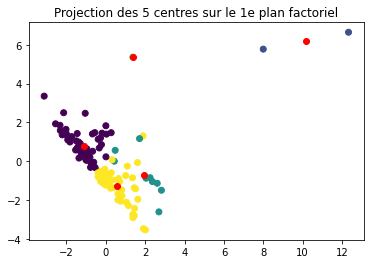

In [71]:
# Affichage des positions des centres de classes :
plt.figure()
centroids = kmeans5.cluster_centers_
centroids_projected = pca.transform(centroids)
plt.scatter(X_projected[:,0], X_projected[:,1], c = kmeans5.labels_)#Graphe nuage des points
plt.scatter(centroids_projected[:,0],centroids_projected[:,1],c = 'r') #Centroides
plt.title("Projection des {} centres sur le 1e plan factoriel".format(len(centroids)))
plt.show()

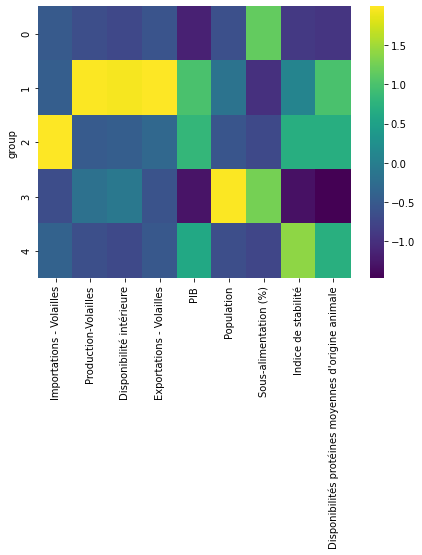

In [72]:
# Heatmap avec les croisements entre les clusters de pays et les différentes variables:

N5_scaled.columns = data_pca.columns

plt.figure(figsize=(7,5))
sns.heatmap(N5_scaled, cmap = 'viridis') # Graphe carte chaleur des groupes des zones
plt.savefig("Carte chaleur avec les croisements entre les clusters de pays et les différentes variables Kmeans_5G.png" , dpi = 300,bbox_inches = 'tight') #enregistrement de figure dans le répertoire de travail et augmentation de la résolution
plt.show()

In [73]:
#Interprétations:

print(C5[C5['group']==2]) #Filtre sur le groupe des pays à recommander
#Groupe 2 : pays qui importent les plus,qui ont un bon Indice de Stabilité et qui sont assez riche donc à recommander
C5[C5['group']==2]

                                                  Zone  group
1                                       Afrique du Sud      2
4                                            Allemagne      2
7                                      Arabie saoudite      2
31                            Chine - RAS de Hong-Kong      2
55                                              France      2
79                                               Japon      2
102                                            Mexique      2
119                                           Pays-Bas      2
131  Royaume-Uni de Grande-Bretagne et d'Irlande du...      2


,Zone,group
1,Afrique du Sud,2
4,Allemagne,2
7,Arabie saoudite,2
31,Chine - RAS de Hong-Kong,2
55,France,2
79,Japon,2
102,Mexique,2
119,Pays-Bas,2
131,Royaume-Uni de Grande-Bretagne et d'Irlande du...,2


In [74]:
# Analyse pour nombre des clusters égale à 6 :

kmeans6 = cluster.KMeans(n_clusters = 6).fit(X_scaled) # 6 clusters

kmeans6.fit(X_scaled)

# Récupération des clusters attribués à chaque individu
clusters = kmeans6.labels_
names = DF.Zone
C6 = pd.DataFrame({"Zone": names,"group": clusters})
A6 = C6.groupby(['Zone']).sum()
#print(C5[C5['group']==0])

print(C6)

#Effectifs par groupe :

names = DF.Zone
B = C6.groupby(['group']).count()
B = pd.DataFrame(data = B)
B.reset_index(inplace = True) #reindexation de dataframe B
B['group'] = B['group'].apply(str)
print(B,'\n')

P = pd.merge(C6, DF, how = 'inner', on = 'Zone') #jointure entre la table C6 et la table DF

N6 = P.groupby(['group']).mean() #Calcul de la moyenne de chaque variable pour chaque groupe

std_scale = preprocessing.StandardScaler().fit(N6)
N6_scaled = std_scale.transform(N6)
N6_scaled = pd.DataFrame(data = N6_scaled)

N6_scaled.columns = data_pca.columns
N6_scaled['group'] = N6_scaled.index
N6_scaled.set_index('group',inplace=True)

print('l’inertie intraclasse :',kmeans6.inertia_)

N6_scaled #

                                       Zone  group
1                            Afrique du Sud      5
2                                   Albanie      1
3                                   Algérie      4
4                                 Allemagne      5
5                                    Angola      4
..                                      ...    ...
158                                 Ukraine      4
159                                 Uruguay      1
161  Venezuela (République bolivarienne du)      0
162                                Viet Nam      4
163                                   Yémen      0

[120 rows x 2 columns]
  group  Zone
0     0    13
1     1    44
2     2     1
3     3     2
4     4    51
5     5     9 

l’inertie intraclasse : 282.3915003007663


,Importations - Volailles,Production-Volailles,Disponibilité intérieure,Exportations - Volailles,PIB,Population,Sous-alimentation (%),Indice de stabilité,Disponibilités protéines moyennes d'origine animale
group,,,,,,,,,
0,-0.406057,-0.619541,-0.671477,-0.518956,-1.036079,-0.568548,2.024473,-1.127815,-1.180200
1,-0.349322,-0.574492,-0.631200,-0.462927,0.878200,-0.580364,-0.716312,1.610996,0.910655
2,-0.627125,-0.076340,0.043783,-0.516182,-1.064704,2.198462,0.400948,-1.067270,-1.223885
3,-0.393204,2.199409,2.168783,2.225430,1.135501,-0.047039,-0.847488,0.250646,1.140006
4,-0.451666,-0.539836,-0.579883,-0.491883,-0.886124,-0.532622,-0.167926,-0.494809,-0.500737
5,2.227374,-0.389200,-0.330005,-0.235483,0.973206,-0.469890,-0.693695,0.828252,0.854160


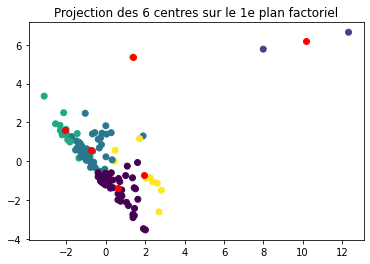

In [49]:
# Affichage des positions des centres de classes
plt.figure()
centroids = kmeans6.cluster_centers_
centroids_projected = pca.transform(centroids)
plt.scatter(X_projected[:,0], X_projected[:,1], c = kmeans6.labels_) #Graphe nuage des points 
plt.scatter(centroids_projected[:,0],centroids_projected[:,1], c = 'r') #Centroides
plt.title("Projection des {} centres sur le 1e plan factoriel".format(len(centroids)))
plt.show()

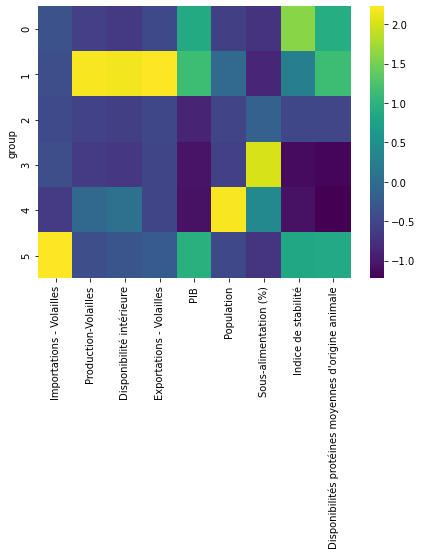

In [50]:
# Heatmap avec les croisements entre les clusters de pays et les différentes variables:

N6_scaled.columns = data_pca.columns

plt.figure(figsize=(7,5))
sns.heatmap(N6_scaled, cmap = 'viridis') # Graphe carte chaleur des groupes des zones
plt.savefig("Carte chaleur avec les croisements entre les clusters de pays et les différentes variables Kmeans_6G.png" , dpi = 300,bbox_inches = 'tight') #enregistrement de figure dans le répertoire de travail et augmentation de la résolution
plt.show()

In [76]:
#Interprétations:

print(C6[C6['group']==5]) #Filtre sur le groupe des pays à recommander
#Groupe 5 : pays qui importent les plus,qui ont un bon Indice de Stabilité et qui sont assez riche donc à recommander
C6[C6['group']==5]

                                                  Zone  group
1                                       Afrique du Sud      5
4                                            Allemagne      5
7                                      Arabie saoudite      5
31                            Chine - RAS de Hong-Kong      5
55                                              France      5
79                                               Japon      5
102                                            Mexique      5
119                                           Pays-Bas      5
131  Royaume-Uni de Grande-Bretagne et d'Irlande du...      5


,Zone,group
1,Afrique du Sud,5
4,Allemagne,5
7,Arabie saoudite,5
31,Chine - RAS de Hong-Kong,5
55,France,5
79,Japon,5
102,Mexique,5
119,Pays-Bas,5
131,Royaume-Uni de Grande-Bretagne et d'Irlande du...,5


In [52]:
# Analyse pour nombre des clusters égale à 7 :

kmeans7 = cluster.KMeans(n_clusters = 7).fit(X_scaled) # 7 clusters

kmeans7.fit(X_scaled)

# Récupération des clusters attribués à chaque individu
clusters = kmeans7.labels_
names = DF.Zone
C7 = pd.DataFrame({"Zone": names,"group": clusters})
A7 = C7.groupby(['Zone']).sum()
#print(C5[C5['group']==0])

print(C7)

#Effectifs par groupe :

names = DF.Zone
B = C7.groupby(['group']).count()
B = pd.DataFrame(data = B)
B.reset_index(inplace = True) #reindexation de dataframe B
B['group'] = B['group'].apply(str)
print(B,'\n')

P = pd.merge(C7, DF, how = 'inner', on = 'Zone') #jointure entre la table C7 et la table DF

N7 = P.groupby(['group']).mean() #Calcul de la moyenne de chaque variable pour chaque groupe

std_scale = preprocessing.StandardScaler().fit(N7)
N7_scaled = std_scale.transform(N7)
N7_scaled = pd.DataFrame(data = N7_scaled)

N7_scaled.columns = data_pca.columns
N7_scaled['group'] = N7_scaled.index
N7_scaled.set_index('group',inplace=True)
print('l’inertie intraclasse :',kmeans7.inertia_)

N7_scaled #


                                       Zone  group
1                            Afrique du Sud      2
2                                   Albanie      0
3                                   Algérie      5
4                                 Allemagne      2
5                                    Angola      5
..                                      ...    ...
158                                 Ukraine      5
159                                 Uruguay      0
161  Venezuela (République bolivarienne du)      3
162                                Viet Nam      0
163                                   Yémen      3

[120 rows x 2 columns]
  group  Zone
0     0    37
1     1     2
2     2    11
3     3    13
4     4    11
5     5    45
6     6     1 

l’inertie intraclasse : 228.69167715754057


,Importations - Volailles,Production-Volailles,Disponibilité intérieure,Exportations - Volailles,PIB,Population,Sous-alimentation (%),Indice de stabilité,Disponibilités protéines moyennes d'origine animale
group,,,,,,,,,
0,-0.304594,-0.486443,-0.525592,-0.421272,-0.301661,-0.507503,-0.588247,0.711409,0.493879
1,-0.340126,2.409358,2.376908,2.438222,0.549027,0.039972,-0.774723,-0.029923,0.952660
2,2.438209,-0.357815,-0.304433,-0.178526,0.518810,-0.427515,-0.616847,0.505473,0.657873
3,-0.355246,-0.561688,-0.603096,-0.474909,-0.931699,-0.509806,2.205350,-1.147087,-1.280755
4,-0.371098,-0.521105,-0.563530,-0.443256,1.962289,-0.526043,-0.733760,1.785300,1.224510
5,-0.451846,-0.493128,-0.527612,-0.448294,-0.845548,-0.476301,-0.012483,-0.727152,-0.725361
6,-0.615300,0.010821,0.147355,-0.471964,-0.951218,2.407195,0.520710,-1.098019,-1.322807


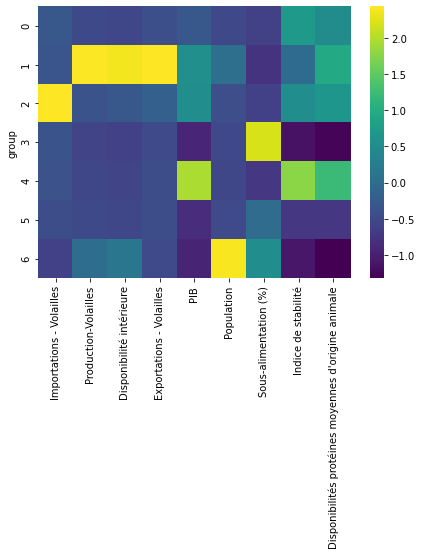

In [53]:
# Heatmap avec les croisements entre les clusters de pays et les différentes variables:

N7_scaled.columns = data_pca.columns

plt.figure(figsize=(7,5))
sns.heatmap(N7_scaled, cmap = 'viridis') # Graphe carte chaleur des groupes des zones
plt.savefig("Carte chaleur avec les croisements entre les clusters de pays et les différentes variables Kmeans_7G.png" , dpi = 300,bbox_inches = 'tight') #enregistrement de figure dans le répertoire de travail et augmentation de la résolution
plt.show()

In [77]:
#Interprétations:

print(C7[C7['group']==2]) #Filtre sur le groupe des pays à recommander
#Groupe 4 : pays qui importent les plus,qui ont un bon Indice de Stabilité et qui sont assez riche donc à recommander

                                                  Zone  group
1                                       Afrique du Sud      2
4                                            Allemagne      2
7                                      Arabie saoudite      2
17                                            Belgique      2
31                            Chine - RAS de Hong-Kong      2
45                                 Émirats arabes unis      2
55                                              France      2
79                                               Japon      2
102                                            Mexique      2
119                                           Pays-Bas      2
131  Royaume-Uni de Grande-Bretagne et d'Irlande du...      2


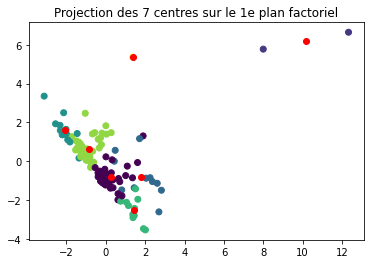

In [55]:
# Affichage des positions des centres de classes
plt.figure()
centroids = kmeans7.cluster_centers_
centroids_projected = pca.transform(centroids)
plt.scatter(X_projected[:,0], X_projected[:,1], c = kmeans7.labels_)#Graphe nuage des points
plt.scatter(centroids_projected[:,0],centroids_projected[:,1], c='r')#Centroides
plt.title("Projection des {} centres sur le 1e plan factoriel".format(len(centroids)))
plt.show()

In [78]:
# Analyse pour nombre des clusters égale à 8 :

kmeans8 = cluster.KMeans(n_clusters = 8).fit(X_scaled) # 8 clusters

kmeans8.fit(X_scaled)

# Récupération des clusters attribués à chaque individu
clusters = kmeans8.labels_
names = DF.Zone
C8 = pd.DataFrame({"Zone": names,"group": clusters})
A8 = C8.groupby(['Zone']).sum()
#print(C5[C5['group']==0])

print(C8)

#Effectifs par groupe :

names = DF.Zone
B = C8.groupby(['group']).count()
B = pd.DataFrame(data = B)
B.reset_index(inplace = True) #reindexation de dataframe B
B['group'] = B['group'].apply(str)
print(B,'\n')

P = pd.merge(C8, DF, how = 'inner', on = 'Zone') #jointure entre la table C6 et la table DF

N8 = P.groupby(['group']).mean() #Calcul de la moyenne de chaque variable pour chaque groupe

std_scale = preprocessing.StandardScaler().fit(N8)
N8_scaled = std_scale.transform(N8)
N8_scaled = pd.DataFrame(data = N8_scaled)

N8_scaled.columns = data_pca.columns
N8_scaled['group'] = N8_scaled.index
N8_scaled.set_index('group',inplace=True)
print('l’inertie intraclasse :',kmeans8.inertia_)

N8_scaled #

                                       Zone  group
1                            Afrique du Sud      0
2                                   Albanie      1
3                                   Algérie      4
4                                 Allemagne      7
5                                    Angola      4
..                                      ...    ...
158                                 Ukraine      0
159                                 Uruguay      1
161  Venezuela (République bolivarienne du)      5
162                                Viet Nam      4
163                                   Yémen      5

[120 rows x 2 columns]
  group  Zone
0     0    13
1     1    35
2     2     2
3     3     1
4     4    36
5     5    13
6     6    12
7     7     8 

l’inertie intraclasse : 202.68490964676047


,Importations - Volailles,Production-Volailles,Disponibilité intérieure,Exportations - Volailles,PIB,Population,Sous-alimentation (%),Indice de stabilité,Disponibilités protéines moyennes d'origine animale
group,,,,,,,,,
0,-0.202020,-0.262311,-0.244159,-0.356569,-0.741686,-0.305813,-0.216595,-1.453144,-0.471829
1,-0.322361,-0.494995,-0.544986,-0.401232,-0.144506,-0.503038,-0.601358,0.887046,0.594841
2,-0.360684,2.597080,2.558334,2.630186,0.673131,0.090470,-0.787562,0.121244,1.040015
3,-0.615981,0.053915,0.196489,-0.457622,-0.897401,2.598222,0.585513,-0.879182,-1.329751
4,-0.458503,-0.534208,-0.580007,-0.459032,-0.791923,-0.499447,0.062318,-0.141214,-0.709059
5,-0.374711,-0.553115,-0.598490,-0.460746,-0.876968,-0.491945,2.371122,-0.925142,-1.285957
6,-0.294158,-0.508093,-0.559829,-0.387264,2.064942,-0.508886,-0.747762,1.734198,1.281696
7,2.628418,-0.298273,-0.227353,-0.107720,0.714412,-0.379561,-0.665676,0.656193,0.880044


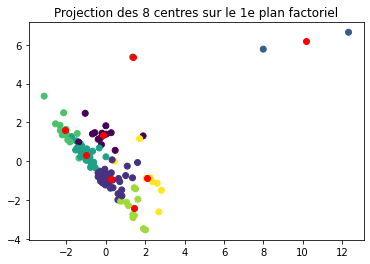

In [79]:
# Affichage des positions des centres de classes
plt.figure()
centroids = kmeans8.cluster_centers_
centroids_projected = pca.transform(centroids)
plt.scatter(X_projected[:,0], X_projected[:,1], c = kmeans8.labels_)#Graphe nuage des points
plt.scatter(centroids_projected[:,0],centroids_projected[:,1], c = 'r')#Centroides
plt.title("Projection des {} centres sur le 1e plan factoriel".format(len(centroids)))
plt.show()

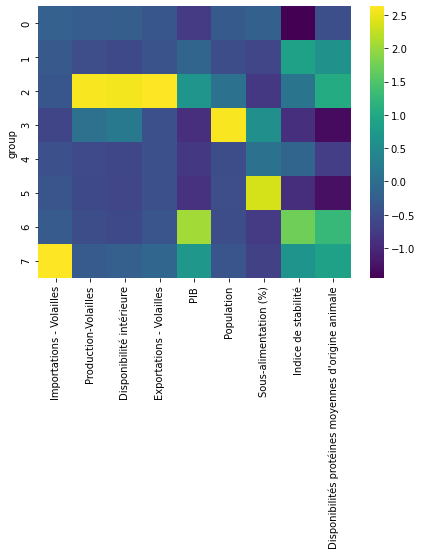

In [80]:
# Heatmap avec les croisements entre les clusters de pays et les différentes variables:

N8_scaled.columns = data_pca.columns

plt.figure(figsize=(7,5))
sns.heatmap(N8_scaled, cmap = 'viridis') # Graphe carte chaleur des groupes des zones
plt.savefig("Carte chaleur avec les croisements entre les clusters de pays et les différentes variables Kmeans_8G.png" , dpi = 300,bbox_inches = 'tight') #enregistrement de figure dans le répertoire de travail et augmentation de la résolution
plt.show()

In [81]:
#Interprétations:

print(C8[C8['group']==7]) #Filtre sur le groupe des pays à recommander
#Groupe 4 : pays qui importent les plus,qui ont un bon Indice de Stabilité et qui sont assez riche donc à recommander

                                                  Zone  group
4                                            Allemagne      7
7                                      Arabie saoudite      7
31                            Chine - RAS de Hong-Kong      7
55                                              France      7
79                                               Japon      7
102                                            Mexique      7
119                                           Pays-Bas      7
131  Royaume-Uni de Grande-Bretagne et d'Irlande du...      7


In [60]:
# Analyse pour nombre des clusters égale à 9 :

kmeans9 = cluster.KMeans(n_clusters = 9).fit(X_scaled) # 9 clusters

kmeans9.fit(X_scaled)

# Récupération des clusters attribués à chaque individu
clusters = kmeans9.labels_
names = DF.Zone
C9 = pd.DataFrame({"Zone": names,"group": clusters})
A9 = C9.groupby(['Zone']).sum()
#print(C5[C5['group']==0])

print(C9)

#Effectifs par groupe :

names = DF.Zone
B = C9.groupby(['group']).count()
B = pd.DataFrame(data = B)
B.reset_index(inplace = True) #reindexation de dataframe B
B['group'] = B['group'].apply(str)
print(B,'\n')

P = pd.merge(C9, DF, how = 'inner', on = 'Zone') #jointure entre la table C9 et la table DF

N9 = P.groupby(['group']).mean() #Calcul de la moyenne de chaque variable pour chaque groupe

std_scale = preprocessing.StandardScaler().fit(N9)
N9_scaled = std_scale.transform(N9)
N9_scaled = pd.DataFrame(data = N9_scaled)

N9_scaled.columns = data_pca.columns
N9_scaled['group'] = N9_scaled.index
N9_scaled.set_index('group',inplace=True)
print('l’inertie intraclasse :',kmeans9.inertia_)

N9_scaled #


                                       Zone  group
1                            Afrique du Sud      4
2                                   Albanie      5
3                                   Algérie      3
4                                 Allemagne      4
5                                    Angola      3
..                                      ...    ...
158                                 Ukraine      0
159                                 Uruguay      5
161  Venezuela (République bolivarienne du)      7
162                                Viet Nam      3
163                                   Yémen      7

[120 rows x 2 columns]
  group  Zone
0     0    12
1     1     9
2     2     1
3     3    36
4     4     9
5     5    38
6     6     1
7     7    13
8     8     1 

l’inertie intraclasse : 184.46679379401638


,Importations - Volailles,Production-Volailles,Disponibilité intérieure,Exportations - Volailles,PIB,Population,Sous-alimentation (%),Indice de stabilité,Disponibilités protéines moyennes d'origine animale
group,,,,,,,,,
0,-0.282284,-0.425664,-0.405906,-0.505203,-0.722797,-0.325886,-0.136293,-1.558100,-0.586838
1,-0.369316,-0.633772,-0.655520,-0.571707,1.942291,-0.555016,-0.671364,1.769408,1.306989
2,-0.040204,2.318029,2.439218,1.695517,1.500925,0.229972,-0.725981,0.647247,1.344803
3,-0.409419,-0.637581,-0.655196,-0.590101,-0.762614,-0.538915,0.148737,-0.143050,-0.797148
4,2.793571,-0.452423,-0.380917,-0.338246,0.386690,-0.414459,-0.551891,0.557721,0.604056
5,-0.226932,-0.604042,-0.625774,-0.534259,-0.126794,-0.541752,-0.549465,0.943000,0.457420
6,-0.579948,-0.180996,-0.065310,-0.588982,-0.852464,2.737083,0.687222,-0.880867,-1.391818
7,-0.318684,-0.652259,-0.669237,-0.591460,-0.835059,-0.530981,2.525016,-0.926818,-1.349859
8,-0.566783,1.268708,1.018642,2.024440,-0.530179,-0.060047,-0.725981,-0.408541,0.412394


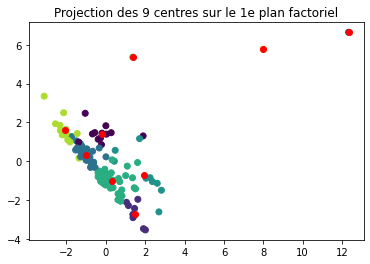

In [61]:
# Affichage des positions des centres de classes
plt.figure()
centroids = kmeans9.cluster_centers_
centroids_projected = pca.transform(centroids)
plt.scatter(X_projected[:,0], X_projected[:,1], c = kmeans9.labels_)#Graphe nuage des points
plt.scatter(centroids_projected[:,0],centroids_projected[:,1], c = 'r')#Centroides
plt.title("Projection des {} centres sur le 1e plan factoriel".format(len(centroids)))
plt.show()

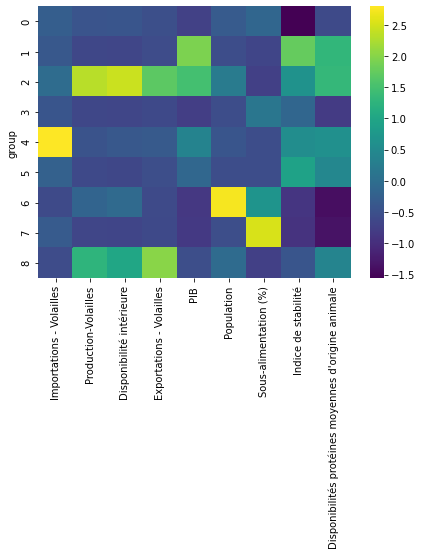

In [62]:
# Heatmap avec les croisements entre les clusters de pays et les différentes variables:

N9_scaled.columns = data_pca.columns

plt.figure(figsize=(7,5))
sns.heatmap(N9_scaled, cmap = 'viridis') # Graphe carte chaleur des groupes des zones
plt.savefig("Carte chaleur avec les croisements entre les clusters de pays et les différentes variables Kmeans_9G.png" , dpi = 300,bbox_inches = 'tight') #enregistrement de figure dans le répertoire de travail et augmentation de la résolution
plt.show()

In [63]:
#Interprétations:

print(C9[C9['group']==6]) #Filtre sur le groupe des pays à recommander
#Groupe 2 : pays qui importent les plus,qui ont un bon Indice de Stabilité et qui sont assez riche donc à recommander

    Zone  group
70  Inde      6


In [64]:
# Analyse pour nombre des clusters égale à 10 :

kmeans10 = cluster.KMeans(n_clusters = 10).fit(X_scaled) # 10 clusters

kmeans10.fit(X_scaled)

# Récupération des clusters attribués à chaque individu
clusters = kmeans10.labels_
names = DF.Zone
C10 = pd.DataFrame({"Zone": names,"group": clusters})
A10 = C10.groupby(['Zone']).sum()
#print(C5[C5['group']==0])

print(C10)

#Effectifs par groupe :

names = DF.Zone
B = C10.groupby(['group']).count()
B = pd.DataFrame(data = B)
B.reset_index(inplace = True) #reindexation de dataframe B
B['group'] = B['group'].apply(str)
print(B,'\n')

P = pd.merge(C10, DF, how = 'inner', on = 'Zone') #jointure entre la table C10 et la table DF

N10 = P.groupby(['group']).mean() #Calcul de la moyenne de chaque variable pour chaque groupe

std_scale = preprocessing.StandardScaler().fit(N10)
N10_scaled = std_scale.transform(N10)
N10_scaled = pd.DataFrame(data = N10_scaled)

N10_scaled.columns = data_pca.columns
N10_scaled['group'] = N10_scaled.index
N10_scaled.set_index('group',inplace=True)
print('l’inertie intraclasse :',kmeans10.inertia_)

N10_scaled #


                                       Zone  group
1                            Afrique du Sud      5
2                                   Albanie      1
3                                   Algérie      0
4                                 Allemagne      5
5                                    Angola      8
..                                      ...    ...
158                                 Ukraine      0
159                                 Uruguay      1
161  Venezuela (République bolivarienne du)      3
162                                Viet Nam      8
163                                   Yémen      9

[120 rows x 2 columns]
  group  Zone
0     0    14
1     1    34
2     2     1
3     3    11
4     4     1
5     5    11
6     6    11
7     7     1
8     8    34
9     9     2 

l’inertie intraclasse : 168.38614321311698


,Importations - Volailles,Production-Volailles,Disponibilité intérieure,Exportations - Volailles,PIB,Population,Sous-alimentation (%),Indice de stabilité,Disponibilités protéines moyennes d'origine animale
group,,,,,,,,,
0,-0.371110,-0.397281,-0.382808,-0.472341,-0.660483,-0.309020,-0.382063,-0.871458,-0.438294
1,-0.353550,-0.552756,-0.576318,-0.500536,-0.139767,-0.506997,-0.621284,0.832932,0.608335
2,-0.052558,2.461320,2.588043,1.818499,1.699405,0.295925,-0.754265,0.666108,1.475632
3,-0.556884,-0.602076,-0.626634,-0.549065,-0.774862,-0.502175,1.411086,-0.128573,-1.128596
4,-0.658018,-0.114946,0.004843,-0.546500,-0.789226,2.901933,0.247259,-0.426578,-1.194767
5,2.783212,-0.427769,-0.370156,-0.290867,0.596999,-0.399215,-0.632209,0.647144,0.733694
6,-0.382809,-0.566337,-0.585215,-0.521490,1.958188,-0.513954,-0.722596,1.504135,1.285391
7,-0.643250,1.379566,1.122844,2.159013,-0.448420,-0.005534,-0.754265,-0.088839,0.565786
8,-0.455763,-0.586098,-0.603728,-0.547650,-0.693241,-0.505134,-0.103659,0.144306,-0.614606


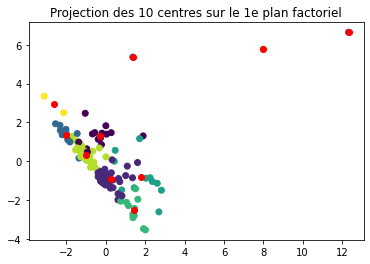

In [65]:
# Affichage des positions des centres de classes
plt.figure()
centroids = kmeans10.cluster_centers_
centroids_projected = pca.transform(centroids)
plt.scatter(X_projected[:,0], X_projected[:,1], c = kmeans10.labels_)#Graphe nuage des points
plt.scatter(centroids_projected[:,0],centroids_projected[:,1], c = 'r') #Centroides
plt.title("Projection des {} centres sur le 1e plan factoriel".format(len(centroids)))
plt.show()

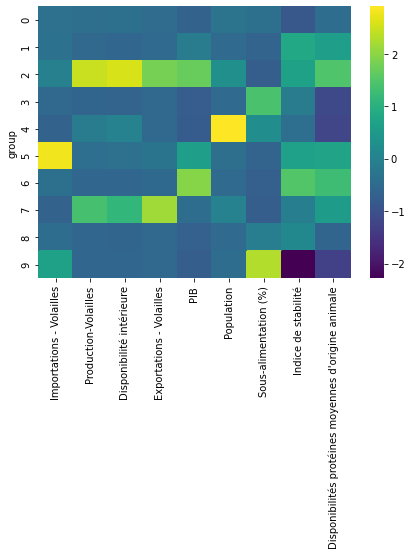

In [66]:
# Heatmap avec les croisements entre les clusters de pays et les différentes variables:

N10_scaled.columns = data_pca.columns

plt.figure(figsize=(7,5))
sns.heatmap(N10_scaled, cmap = 'viridis') # Graphe carte chaleur des groupes des zones
plt.savefig("Carte chaleur avec les croisements entre les clusters de pays et les différentes variables Kmeans_10G.png" , dpi = 300,bbox_inches = 'tight') #enregistrement de figure dans le répertoire de travail et augmentation de la résolution
plt.show()

In [67]:
#Interprétations:

print(C10[C10['group']==5]) #Filtre sur le groupe des pays à recommander
#Groupe 8 : pays qui importent les plus,qui ont un bon Indice de Stabilité et qui sont assez riche donc à recommander
print(C10[C10['group']==9]) #Filtre sur le groupe des pays à recommander
#Groupe 8 : pays qui importent les plus,qui ont un bon Indice de Stabilité et qui sont assez riche donc à recommander

                                                  Zone  group
1                                       Afrique du Sud      5
4                                            Allemagne      5
7                                      Arabie saoudite      5
17                                            Belgique      5
31                            Chine - RAS de Hong-Kong      5
45                                 Émirats arabes unis      5
55                                              France      5
79                                               Japon      5
102                                            Mexique      5
119                                           Pays-Bas      5
131  Royaume-Uni de Grande-Bretagne et d'Irlande du...      5
      Zone  group
73    Iraq      9
163  Yémen      9
